#  Predicting Whether The Account Holders Will Default Next Month. This Means We Are To Predict The Probability Of Individuals’ Willingness To Pay Back a Credit-Card Loan.

## Problem Statement

Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data, over the past 6 months, for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labelled by whether, in the next month after the 6-month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.

##  Aim Of The Research

The research aims at predicting the credit card default beforehand, that is predicting whether an account will default next month and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
import seaborn as sns
%matplotlib inline

In [5]:
# reading dataset
df = pd.read_csv("default of credit card clients.csv", skiprows = 1) # skiprows to ommit first row.


In [6]:
# viewing the data frame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# a view of what the column is about
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#saving the columns as a list

account_holders = df.columns
account_holders

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
# checking the data types
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [70]:
df.index

RangeIndex(start=0, stop=30000, step=1)

In [6]:
# knowing the lenght of dataframe i.e the numbers of rows
len(df)

30000

In [72]:
# knowing the numbers of rows and columns
df.shape

(30000, 25)

In [10]:
# changing the column case to uppercase

df.columns=df.columns.str.upper()

In [74]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT PAYMENT NEXT MONTH'],
      dtype='object')

In [11]:
# renaming column

df.columns=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',  'PAY_0', 'PAY_2',  'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',  'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT_PAYMENT_NEXT_MONTH']

In [12]:
#dropping the ID column

df.drop(['ID'], axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
df.describe()

,CREDIT_CARD_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [77]:
# an overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CREDIT_CARD_ID              30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [85]:
# checking through for duplicates
df.loc[df.duplicated()]

,CREDIT_CARD_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT_NEXT_MONTH


In [9]:
# summing all the different column values
df.sum()

ID                             450015000
LIMIT_BAL                     5024529680
SEX                                48112
EDUCATION                          55594
MARRIAGE                           46556
AGE                              1064565
PAY_0                               -501
PAY_2                              -4013
PAY_3                              -4986
PAY_4                              -6620
PAY_5                              -7986
PAY_6                              -8733
BILL_AMT1                     1536699927
BILL_AMT2                     1475372255
BILL_AMT3                     1410394644
BILL_AMT4                     1297888469
BILL_AMT5                     1209342029
BILL_AMT6                     1166152812
PAY_AMT1                       169907415
PAY_AMT2                       177634905
PAY_AMT3                       156770445
PAY_AMT4                       144782306
PAY_AMT5                       143981629
PAY_AMT6                       156465077
default payment 

In [24]:
# checking for null values

df.isnull().sum()

CREDIT_CARD_ID                0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
DEFAULT_PAYMENT_NEXT_MONTH    0
dtype: int64

# Data Visualization 

#### This research employed a binary variable, default  payment  next  month (Yes = 1, No = 0), as the response variable.

In [11]:
df['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts()

0    23364
1     6636
Name: DEFAULT_PAYMENT_NEXT_MONTH, dtype: int64

<AxesSubplot:>

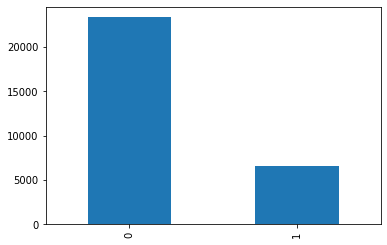

In [66]:
df['DEFAULT_PAYMENT_NEXT_MONTH'].value_counts().plot.bar()

### This means that out of 30000 Account Holders, 23364 people (around 78%) did not default payment.

Text(0.5, 1.0, 'Distribution of DEFAULT_PAYMENT_NEXT_MONTH')

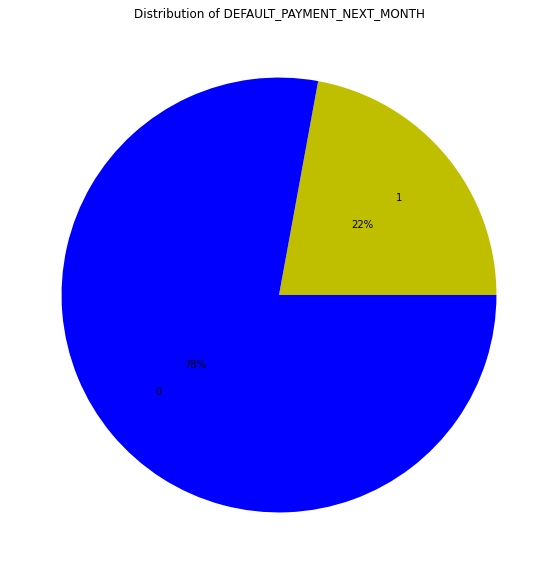

In [65]:
plt.figure(figsize=(10,10))
plt.pie(x=[6636, 23364], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['y','b'])
plt.title('Distribution of DEFAULT_PAYMENT_NEXT_MONTH')

As shown above, the default probability of the sample is 22%. What this means is that, 78% of account holders will not default next month, while 22% account holders will default next month. 

## Visualizing Categorical Features

- SEX
- EDUCATION
- MARRIAGE
- AGE

In [43]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [44]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [45]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

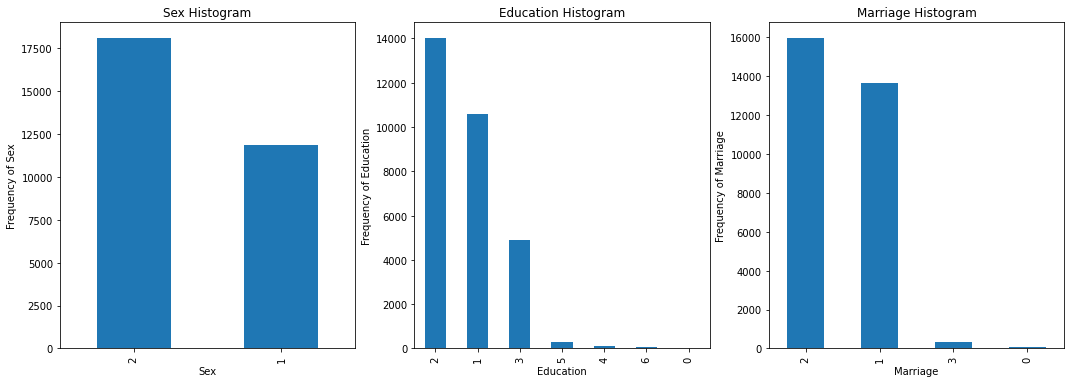

In [40]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt1 = df.SEX.value_counts().plot(kind='bar')
plt.title('Sex Histogram')
plt1.set(xlabel = 'Sex', ylabel='Frequency of Sex')

plt.subplot(1,3,2)
plt1 = df.EDUCATION.value_counts().plot(kind='bar')
plt.title('Education Histogram')
plt1.set(xlabel = 'Education', ylabel='Frequency of Education')

plt.subplot(1,3,3)
plt1 = df.MARRIAGE.value_counts().plot(kind='bar')
plt.title('Marriage Histogram')
plt1.set(xlabel = 'Marriage', ylabel='Frequency of Marriage')


plt.show()


## Inference :

From the SEX Features (1 = male; 2 = female). It can be inferred that: 60% Account Holders in the dataset are Female Account while  40% Account Holders are Male.

From the Education Features (1 = graduate school; 2 = university; 3 = high school; 4 = others). It can be inferred that: The Account Holders in the dataset are more University, follwed by  Graduate School, High School and others. 

From the Marriage Features (1 = married; 2 = single; 3 = others).The Account Holders in the dataset that are 
 are the Single, follwed by Married, and others. 


([], [])

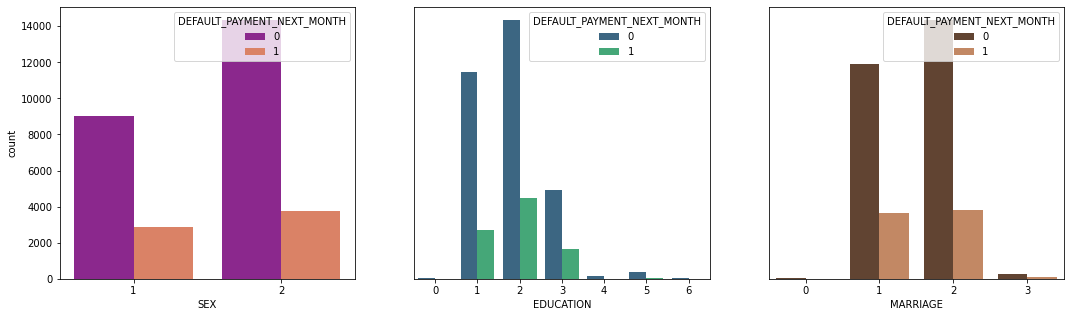

In [51]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='SEX' ,hue='DEFAULT_PAYMENT_NEXT_MONTH', data=df,palette='plasma')

plt.subplot(1,3,2)
sns.countplot(x='EDUCATION',hue='DEFAULT_PAYMENT_NEXT_MONTH',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(1,3,3)
sns.countplot(x='MARRIAGE',hue='DEFAULT_PAYMENT_NEXT_MONTH',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

## Inference :

This research employed a binary variable, default payment (Yes = 1, No = 0) 

Making Comparism between Sex which represents Gender shows that a Female Individual has higher probablity of Defualting next month (probability of failing to make the minimum payment) than the Male individuals. 

Checkecking the results of Educational Categories where 1 = graduate school; 2 = university; 3 = high school; 4 = others. shows that, the University Category have the probality of defaulting next month (probability of failing to make the minimum payment)

Checkecking the results of Marriage Categories where 1 = married; 2 = single; 3 = others. Shows that, Married and Single individauls have the probality of defaulting next month (probability of failing to make the minimum payment) 

In [24]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

c:\Users\USER\Desktop\projects\SGA11_DSCI_12102021_task\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


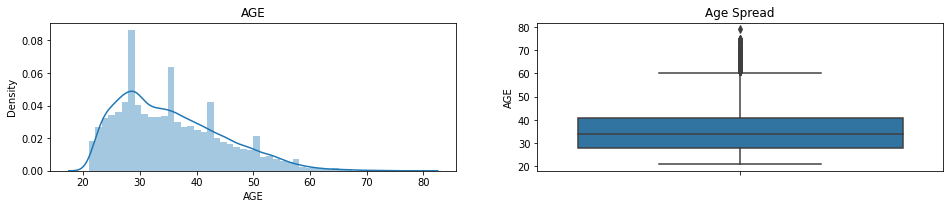

In [47]:
plt.figure(figsize=(16,6))

plt.subplot(2,2,1)
plt.title('AGE')
sns.distplot(df.AGE)

plt.subplot(2,2,2)

plt.title('Age Spread')
sns.boxplot(y=df.AGE)
#plt.hist(df.DEFAULT_PAYMENT_NEXT_MONTH)

plt.show()


<AxesSubplot:>

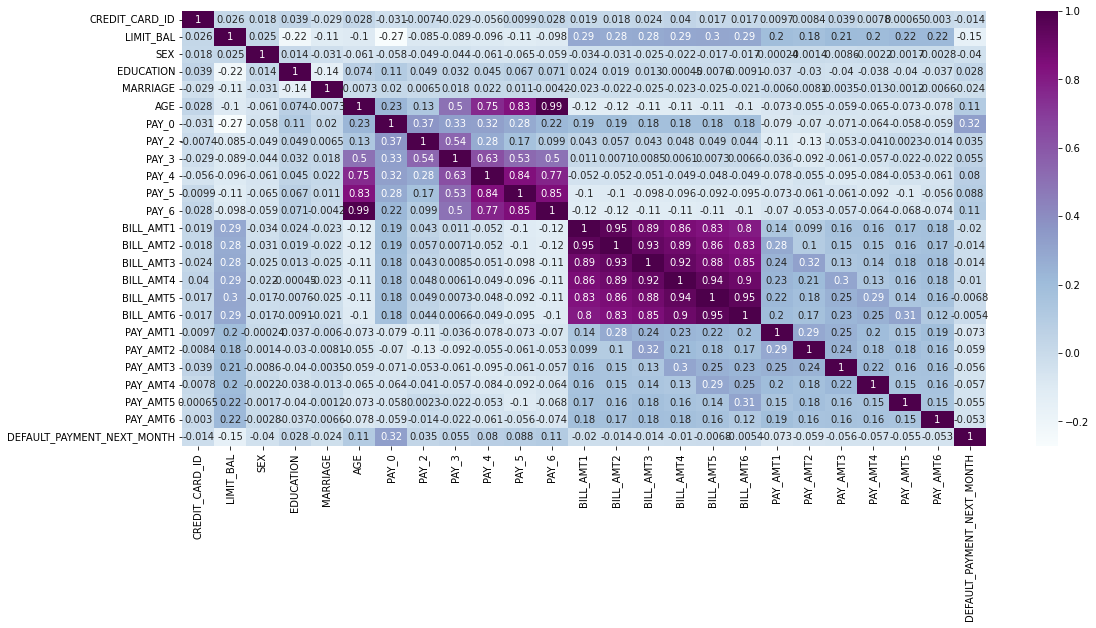

In [66]:
corr = df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot = True, cmap='BuPu')

## Model Building 


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [58]:
target_name = 'DEFAULT_PAYMENT_NEXT_MONTH'
X = df.drop('DEFAULT_PAYMENT_NEXT_MONTH', axis=1) # dropping the target variable
robust_scaler = RobustScaler() # used to rescale features into same scale. eg, limit bal and age
X = robust_scaler.fit_transform(X) # where X is a variable that contains all the features 
y = df[target_name] # the target variable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)


In [59]:
# funtion for printing a good Confusion Matrics
def CMatrix(CM, labels=['NON_DEFAULT_PAYMENT_NEXT_MONTH', 'DEFAULT_PAYMENT_NEXT_MONTH']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum()
    return df 

## DataFrame Preparation For Model Analysis

In [60]:
# Data frame for metrics evalution
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                      columns=['NULL', 'ClassTree', 'NaiveBayes'])

In [61]:
# the NULL Metrics predicts the most common category
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

c:\Users\USER\Desktop\projects\SGA11_DSCI_12102021_task\env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PREDICTION,NON_DEFAULT_PAYMENT_NEXT_MONTH,DEFAULT_PAYMENT_NEXT_MONTH,Total
TRUE,,,
NON_DEFAULT_PAYMENT_NEXT_MONTH,4673,0,12000.0
DEFAULT_PAYMENT_NEXT_MONTH,1327,0,0.0
Total,6000,0,NaN


In [63]:
from sklearn.tree import DecisionTreeClassifier # Import the estimator mdel

# creating an instance for the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10) 

# training the estimator with the training data
class_tree.fit(X_train, y_train)

# evaluating the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'Class_Tree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'Class_Tree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'Class_Tree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,NON_DEFAULT_PAYMENT_NEXT_MONTH,DEFAULT_PAYMENT_NEXT_MONTH,Total
TRUE,,,
NON_DEFAULT_PAYMENT_NEXT_MONTH,4185,488,10040.0
DEFAULT_PAYMENT_NEXT_MONTH,835,492,1960.0
Total,5020,980,NaN


In [56]:
from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()
NBC.fit(X_train, y_train)
y_pred_test = NBC.predict(X_test)
metrics.loc['accuracy', 'NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision', 'NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall', 'NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,NON_DEFAULT_PAYMENT_NEXT_MONTH,DEFAULT_PAYMENT_NEXT_MONTH,Total
TRUE,,,
NON_DEFAULT_PAYMENT_NEXT_MONTH,2751,1922,6258.0
DEFAULT_PAYMENT_NEXT_MONTH,378,949,5742.0
Total,3129,2871,NaN


In [57]:
#data frame for the metrics
1*metrics

,NULL,ClassTree,NaiveBayes,Class_Tree
accuracy,0.778833,NaN,0.616667,0.787667
precision,0.0,NaN,0.330547,0.528711
recall,0.0,NaN,0.715147,0.367747


### Using KNN ML Algorithm

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [20]:
knn = KNeighborsClassifier(n_neighbors = 23)

In [21]:
# preparing the input (x) and target output (y)
x,y = df.drop(['ID', 'DEFAULT_PAYMENT_NEXT_MONTH'], axis=1), df['DEFAULT_PAYMENT_NEXT_MONTH']

In [22]:
# spliting the dataset that will be used for trainning and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [23]:
# fiting using the train dataset
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=23)

In [24]:
# making predictions 
prediction = knn.predict(x_test)

In [14]:
# checking the accuracy 
print('With KNN (k=24) accuracy is: ', knn.score(x_test,y_test))

With KNN (k=24) accuracy is:  0.7796666666666666
